In [1]:
import os

In [3]:
data_dir = "C:/Users/Emily/Documents/Fall_2020/ML_DS/Sample_Sentinel"

In [4]:
os.listdir(data_dir)

['.ipynb_checkpoints',
 'Idrisi32.lo2',
 'Idrisi32.log',
 'L1C_T19TBG_A025748_20200527T154252.rst.aux.xml',
 'L1C_T19TBG_A025748_20200527T154252.tif',
 'Sample_Bing_1.png',
 'Sample_Bing_2.png',
 'Sample_Sentinel_CNN.ipynb',
 'Split1.png',
 'Split_1_Samples',
 'Testing_Data',
 'Training_Data']

In [9]:
test_path = data_dir + '/Testing_Data/'
train_path = data_dir + '/Training_Data/'

In [10]:
test_path

'C:/Users/Emily/Documents/Fall_2020/ML_DS/Sample_Sentinel/Testing_Data/'

In [11]:
os.listdir(train_path + 'Solar')[0]

'Split1_54_06.png'

In [12]:
solar_cell = (train_path + 'Solar/' + 'Split1_54_06.png')

In [15]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

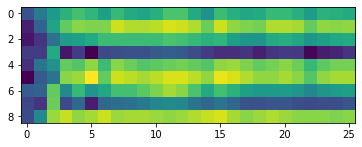

In [19]:
plt.imshow(imread(solar_cell))

In [22]:
imread(solar_cell).max()

0.41960785

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range = 0.1, height_shift_range= 0.1)

In [54]:
image_gen.flow_from_directory(train_path)

Found 28 images belonging to 2 classes.


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [222]:
model = Sequential()

model.add(Conv2D(filters = 10, kernel_size = (9,9), activation = 'relu'))
model.add(MaxPool2D(pool_size =(2,2)))

model.add(Conv2D(filters = 10, kernel_size = (6,6), activation = 'relu'))
model.add(MaxPool2D(pool_size =(2,2)))

model.add(Conv2D(filters = 10, kernel_size = (9,9), activation = 'relu'))
model.add(MaxPool2D(pool_size =(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])

In [223]:
from tensorflow.keras.callbacks import EarlyStopping

In [224]:
early_stop = EarlyStopping(monitor='val_loss', patience = 2)

In [225]:
#batch_size = 2

In [226]:
train_image_gen = image_gen.flow_from_directory(train_path, color_mode='grayscale', class_mode = 'binary')

Found 28 images belonging to 2 classes.


In [227]:
test_image_gen = image_gen.flow_from_directory(test_path, color_mode='grayscale', batch_size = batch_size, class_mode = 'binary')

Found 74 images belonging to 2 classes.


In [228]:
results = model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks = [early_stop])

  ...
    to  
  ['...']
Train for 1 steps, validate for 37 steps
Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 1.4507 - accuracy: 0.5000 - val_loss: 64.8421 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 4s 4s/step - loss: 61.6555 - accuracy: 0.5000 - val_loss: 22.7334 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 4s 4s/step - loss: 36.1916 - accuracy: 0.5000 - val_loss: 6.6940 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 4s 4s/step - loss: 10.4231 - accuracy: 0.5000 - val_loss: 1.1402 - val_accuracy: 0.2432
Epoch 5/20
1/1 [==============================] - 4s 4s/step - loss: 0.9973 - accuracy: 0.3214 - val_loss: 2.3338 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 5s 5s/step - loss: 2.3241 - accuracy: 0.5000 - val_loss: 0.5158 - val_accuracy: 0.7568
Epoch 7/20
1/1 [==============================] - 5s 5s/step - loss: 0.6647 - accuracy: 0.7143 - val_loss: 

In [229]:
pred = model.predict_generator(test_image_gen)

In [236]:
predictions = pred > 0.40

In [237]:
from sklearn.metrics import classification_report, confusion_matrix

In [238]:
print (confusion_matrix(test_image_gen.classes, predictions))

[[19 18]
 [20 17]]


In [239]:
import numpy as np
names = test_image_gen.filenames
names = np.array(names)
names = np.ndarray.flatten(names)
classes = test_image_gen.classes
classes = np.array(classes)
classes = np.ndarray.flatten(classes)
predictions = np.array(predictions)
predictions = np.ndarray.flatten(predictions)

In [240]:
d = {'FileName': names, 'Classes': classes, 'Predictions': predictions}

import pandas as pd
data = pd.DataFrame(data=d)
print (data)

                     FileName  Classes  Predictions
0   NotSolar\Split1_01_02.png        0         True
1   NotSolar\Split1_01_08.png        0         True
2   NotSolar\Split1_01_13.png        0         True
3   NotSolar\Split1_01_16.png        0         True
4   NotSolar\Split1_01_20.png        0         True
..                        ...      ...          ...
69     Solar\Split1_63_11.png        1         True
70     Solar\Split1_64_09.png        1         True
71     Solar\Split1_64_10.png        1        False
72     Solar\Split1_65_09.png        1         True
73     Solar\Split1_65_10.png        1        False

[74 rows x 3 columns]
